In [ ]:
library(tidyverse)
library(mediation)
library(brms)
library(dplyr)
library(lme4)
library(ggplot2)

── Attaching core tidyverse packages ─────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   4.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.1.0     
── Conflicts ───────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


Warning messages:
1: package ‘tidyverse’ was built under R version 4.3.3 
2: package ‘lubridate’ was built under R version 4.3.2 


Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack

Loading required package: mvtnorm
Loading required package: sandwich
mediation: Causal Mediation Analysis
Version: 4.5.1



Warning messages:
1: package ‘mvtnorm’ was built under R version 4.3.3 
2: package ‘sandwich’ was built under R version 4.3.3 


Loading required package: Rcpp
Loading 'brms' package (version 2.22.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').

Attaching package: ‘brms’

The following object is masked from ‘package:stats’:

    ar



Warning message:
package ‘brms’ was built under R version 4.3.3 


# Import Dataset

In [ ]:
df_wide <- read.csv("df_RCT_wide.csv")


## Outcome Measures

### Short (for efficiency)

In [2]:
# -------------------------------
# 1. Define outcome measures (pre/post)
# -------------------------------
outcome_measures <- list(
  # Vascular
  fmd        = list(pre = "fmd_percent_pre", post = "fmd_percent_post"),
  # CPET
  vo2_rel    = list(pre = "cpet_vo2peak_relative_pre", post = "cpet_vo2peak_relative_post"),
  vo2_abs    = list(pre = "cpet_vo2peak_absolute_pre", post = "cpet_vo2peak_absolute_post"),
  vo2_perc   = list(pre = "cpet_vo2max_percentpredicted_pre", post = "cpet_vo2max_percentpredicted_post"),
  # Respiratory
  mip_pre    = list(pre = "mip_pre_max_pre", post = "mip_pre_max_post"),
  mip_post   = list(pre = "mip_post_max_pre", post = "mip_post_max_post"),
  smip_pre   = list(pre = "smip_pre_max_pre", post = "smip_pre_max_post"),
  smip_post  = list(pre = "smip_post_max_pre", post = "smip_post_max_post"),
  pif_pre    = list(pre = "pif_pre_max_pre", post = "pif_pre_max_post"),
  pif_post   = list(pre = "pif_post_max_pre", post = "pif_post_max_post"),
  sindex_pre = list(pre = "sindex_pre_max_pre", post = "sindex_pre_max_post"),
  sindex_post= list(pre = "sindex_post_max_pre", post = "sindex_post_max_post"),
  # Subjective
  fss        = list(pre = "fss_sum_pre", post = "fss_sum_post"),
  dsq        = list(pre = "dsq_sum_pre", post = "dsq_sum_post"),
  woods      = list(pre = "woods_sum_pre", post = "woods_sum_post"),
  vas_fatigue= list(pre = "vas_fatiguecurrent_pre", post = "vas_fatiguecurrent_post"),
  psqi       = list(pre = "psqi_sum_pre", post = "psqi_sum_post"),
  sfpa       = list(pre = "sfpa_sum_pre", post = "sfpa_sum_post")
)

### Full

In [5]:
# -------------------------------
# 1. Define outcome measures (pre/post)
# -------------------------------
outcome_measures <- list(
  # Vascular measures
  fmd_percent = list(pre = "fmd_percent_pre", post = "fmd_percent_post"),
  fmd_diameter_baseline = list(pre = "fmd_diameter_baseline_pre", post = "fmd_diameter_baseline_post"),
  fmd_diameter_maximum = list(pre = "fmd_diameter_maximum_pre", post = "fmd_diameter_maximum_post"),
  fmd_shear_baseline = list(pre = "fmd_shear_baseline_pre", post = "fmd_shear_baseline_post"),
  fmd_shear_maximum = list(pre = "fmd_shear_maximum_pre", post = "fmd_shear_maximum_post"),
  fmd_velocity_baseline = list(pre = "fmd_velocity_baseline_pre", post = "fmd_velocity_baseline_post"),
  fmd_velocity_maximum = list(pre = "fmd_velocity_maximum_pre", post = "fmd_velocity_maximum_post"),
  fmd_shear_areatomaximum = list(pre = "fmd_shear_areatomaximum_pre", post = "fmd_shear_areatomaximum_post"),
  fmd_shear_auc = list(pre = "fmd_shear_auc_pre", post = "fmd_shear_auc_post"),
  cpet_sbp_sitting = list(pre = "cpet_sbp_sitting_pre", post = "cpet_sbp_sitting_post"),
  cpet_dbp_sitting = list(pre = "cpet_dbp_sitting_pre", post = "cpet_dbp_sitting_post"),
  
  # CPET Measures
  cpet_vo2peak_relative = list(pre = "cpet_vo2peak_relative_pre", post = "cpet_vo2peak_relative_post"),
  cpet_vo2peak_predicted = list(pre = "cpet_vo2peak_predicted_pre", post = "cpet_vo2peak_predicted_post"),
  cpet_vo2peak_absolute = list(pre = "cpet_vo2peak_absolute_pre", post = "cpet_vo2peak_absolute_post"),
  cpet_ve = list(pre = "cpet_ve_pre", post = "cpet_ve_post"),
  cpet_rer = list(pre = "cpet_rer_pre", post = "cpet_rer_post"),
  cpet_o2pulse = list(pre = "cpet_o2pulse_pre", post = "cpet_o2pulse_post"),
  cpet_vt_peak = list(pre = "cpet_vt_peak_pre", post = "cpet_vt_peak_post"),
  cpet_rr_peak = list(pre = "cpet_rr_peak_pre", post = "cpet_rr_peak_post"),
  cpet_hr_peak = list(pre = "cpet_hr_peak_pre", post = "cpet_hr_peak_post"),
  cpet_oues = list(pre = "cpet_oues_pre", post = "cpet_oues_post"),
  
  # Fatigue/Brain Fog Measures
  fss_sum = list(pre = "fss_sum_pre", post = "fss_sum_post"),
  dsq_sum = list(pre = "dsq_sum_pre", post = "dsq_sum_post"),
  woods_sum = list(pre = "woods_sum_pre", post = "woods_sum_post"),
  vas_fatiguebest = list(pre = "vas_fatiguebest_pre", post = "vas_fatiguebest_post"),
  vas_fatigueworst = list(pre = "vas_fatigueworst_pre", post = "vas_fatigueworst_post"),
  vas_fatiguecurrent = list(pre = "vas_fatiguecurrent_pre", post = "vas_fatiguecurrent_post"),

  # Sleep Measures
  psqi_sum = list(pre = "psqi_sum_pre", post = "psqi_sum_post"),
  psqi_quality = list(pre = "psqi_quality_pre", post = "psqi_quality_post"),
  psqi_latency = list(pre = "psqi_latency_pre", post = "psqi_latency_post"),
  psqi_duration = list(pre = "psqi_duration_pre", post = "psqi_duration_post"),
  psqi_efficiency = list(pre = "psqi_efficiency_pre", post = "psqi_efficiency_post"),
  psqi_disturbances = list(pre = "psqi_disturbances_pre", post = "psqi_disturbances_post"),
  psqi_medication = list(pre = "psqi_medication_pre", post = "psqi_medication_post"),
  psqi_dysfunction = list(pre = "psqi_dysfunction_pre", post = "psqi_dysfunction_post"),

  # Dyspnea Measures
  mmrc_score = list(pre = "mmrc_score_pre", post = "mmrc_score_post"),

  # MSK Measures
  odi_sum = list(pre = "odi_sum_pre", post = "odi_sum_post"),
  ndi_sum = list(pre = "ndi_sum_pre", post = "ndi_sum_post"),
  vas_backpainbest = list(pre = "vas_backpainbest_pre", post = "vas_backpainbest_post"),
  vas_backpainworst = list(pre = "vas_backpainworst_pre", post = "vas_backpainworst_post"),
  vas_backpaincurrent = list(pre = "vas_backpaincurrent_pre", post = "vas_backpaincurrent_post"),
  vas_neckpainbest = list(pre = "vas_neckpainbest_pre", post = "vas_neckpainbest_post"),
  vas_neckpainworst = list(pre = "vas_neckpainworst_pre", post = "vas_neckpainworst_post"),
  vas_neckpaincurrent = list(pre = "vas_neckpaincurrent_pre", post = "vas_neckpaincurrent_post"),
  vas_myalgiabest = list(pre = "vas_myalgiabest_pre", post = "vas_myalgiabest_post"),
  vas_myalgiaworst = list(pre = "vas_myalgiaworst_pre", post = "vas_myalgiaworst_post"),
  vas_myalgiacurrent = list(pre = "vas_myalgiacurrent_pre", post = "vas_myalgiacurrent_post"),
  vas_dizzybest = list(pre = "vas_dizzybest_pre", post = "vas_dizzybest_post"),
  vas_dizzyworst = list(pre = "vas_dizzyworst_pre", post = "vas_dizzyworst_post"),
  vas_dizzycurrent = list(pre = "vas_dizzycurrent_pre", post = "vas_dizzycurrent_post"),

  # Functional Activity Measures
  sfpa_sum = list(pre = "sfpa_sum_pre", post = "sfpa_sum_post"), 
  pcfs_score = list(pre = "pcfs_score_pre", post = "pcfs_score_post"),
  eq_vas = list(pre = "eq_vas_pre", post = "eq_vas_post"),

  # Psychological Measures
  anxiety_sum = list(pre = "anxiety_sum_pre", post = "anxiety_sum_post"),
  anxiety_dichotomous = list(pre = "anxiety_dichotomous_pre", post = "anxiety_dichotomous_post"),
  depression_sum = list(pre = "depression_sum_pre", post = "depression_sum_post"),
  depression_dichotomous = list(pre = "depression_dichotomous_pre", post = "depression_dichotomous_post"),
  ptsd_sum = list(pre = "ptsd_sum_pre", post = "ptsd_sum_post"),
  ptsd_dichotomous = list(pre = "ptsd_dichotomous_pre", post = "ptsd_dichotomous_post"),
  
  # Respiratory measures
  mip_pre_max = list(pre = "mip_pre_max_pre", post = "mip_pre_max_post"),
  mip_post_max = list(pre = "mip_post_max_pre", post = "mip_post_max_post"),
  smip_pre_max = list(pre = "smip_pre_max_pre", post = "smip_pre_max_post"),
  smip_post_max = list(pre = "smip_post_max_pre", post = "smip_post_max_post"),
  pif_pre_max = list(pre = "pif_pre_max_pre", post = "pif_pre_max_post"),
  pif_post_max = list(pre = "pif_post_max_pre", post = "pif_post_max_post"),
  sindex_pre_max = list(pre = "sindex_pre_max_pre", post = "sindex_pre_max_post"),
  sindex_post_max = list(pre = "sindex_post_max_pre", post = "sindex_post_max_post"),
  fit_pre_max = list(pre = "fit_pre_max_pre", post = "fit_pre_max_post"),
  fit_post_max = list(pre = "fit_post_max_pre", post = "fit_post_max_post"),
  volume_pre_max = list(pre = "volume_pre_max_pre", post = "volume_pre_max_post"),
  volume_post_max = list(pre = "volume_post_max_pre", post = "volume_post_max_post"),

  # Autonomic Measures
  hrv_sdnn = list(pre = "hrv_sdnn_pre", post = "hrv_sdnn_post"),
  hrv_rmssd = list(pre = "hrv_rmssd_pre", post = "hrv_rmssd_post"),
  hrv_heartrate = list(pre = "hrv_heartrate_pre", post = "hrv_heartrate_post"),
  hrv_lfhf = list(pre = "hrv_lfhf_pre", post = "hrv_lfhf_post"),
  cpet_hrr1 = list(pre = "cpet_hrr1_pre", post = "cpet_hrr1_post"),
  cpet_hrr2 = list(pre = "cpet_hrr2_pre", post = "cpet_hrr2_post"),
  cpet_chronindex = list(pre = "cpet_chronindex_pre", post = "cpet_chronindex_post")
)

In [ ]:
## Create Wide Table

In [3]:

# Import
df_long <- read.csv("C:/Users/ZCooper/Documents/GitHub/longcovid/df_RCT.csv")

# Programmatically extract all raw column names from outcome_measures
all_columns_raw <- unique(unlist(lapply(outcome_measures, function(x) c(x$pre, x$post))))
# But remove the _pre/_post suffix, since df_long doesn't have it yet
all_columns_raw <- gsub("_pre$", "", all_columns_raw)
all_columns_raw <- gsub("_post$", "", all_columns_raw)

# 3a. Pivot long → wide
df <- df_long %>%
  pivot_wider(
    id_cols = c(record_id, interventiongroup),
    names_from = time_point,
    values_from = all_of(all_columns_raw)
  )

# 3b. Rename columns (_1 → _pre, _2 → _post)
df <- df %>%
  rename_with(~ str_replace(.x, "_1$", "_pre")) %>%
  rename_with(~ str_replace(.x, "_2$", "_post"))


: Error in `all_of()`:
! Can't subset columns that don't exist.
✖ Columns `cpet_vo2max_percentpredicted` and `cpet_vo2max_percentpredicted` don't exist.

## Export

In [12]:
write.csv(df, "df_RCT_wide.csv", row.names = FALSE)

# Parallel Mediation

In [15]:
library(lavaan)

model <- '
  # mediator regressions (ANCOVA style)
  mip_post_max_post  ~ a1*interventiongroup + b1*mip_post_max_pre
  fmd_percent_post  ~ a2*interventiongroup + b2*fmd_percent_post
  cpet_vo2peak_relative_post  ~ a3*interventiongroup + b3*cpet_vo2peak_relative_pre

  # outcome regression (ANCOVA style + mediators)
  fss_sum_post ~ cp*interventiongroup + d1*mip_post_max_post + d2*fmd_percent_post + d3*cpet_vo2peak_relative_post +
                  e1*fss_sum_pre + e2*mip_post_max_pre + e3*fmd_percent_pre + e4*cpet_vo2peak_relative_pre

  # indirect effects
  indirect_mip := a1 * d1
  indirect_fmd := a2 * d2
  indirect_vo2 := a3 * d3

  total_indirect := indirect_mip + indirect_fmd + indirect_vo2
  total_effect := cp + total_indirect
'

fit <- sem(model, data = df_wide, se = "bootstrap", bootstrap = 2000)
summary(fit, standardized = TRUE, fit.measures = TRUE, rsquare = TRUE)
parameterEstimates(fit, boot.ci.type = "perc", standardized = TRUE)


There were 50 or more warnings (use warnings() to see the first 50)


In [16]:
warnings()

Warning messages:
1: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
2: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
3: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
4: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
5: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
6: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
7: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
8: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
9: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
10: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive-definite
11: lavaan->lav_samplestats_icov():  
   sample covariance matrix is not positive

# Frequentist Mediation

## ANCOVA


Mediator model (summary):
# A tibble: 3 × 7
  term              estimate std.error statistic  p.value conf.low conf.high
  <chr>                <dbl>     <dbl>     <dbl>    <dbl>    <dbl>     <dbl>
1 (Intercept)         33.8      20.3        1.67 0.123     -10.8       78.4 
2 mip_pre_max_pre      0.487     0.445      1.10 0.297      -0.491      1.47
3 interventiongroup   61.3      13.5        4.55 0.000833   31.6       90.9 

Outcome model (summary):
# A tibble: 5 × 7
  term              estimate std.error statistic p.value conf.low conf.high
  <chr>                <dbl>     <dbl>     <dbl>   <dbl>    <dbl>     <dbl>
1 (Intercept)        17.6       21.5       0.817  0.435  -31.1       66.3  
2 fss_sum_pre         0.697      0.285     2.45   0.0368   0.0533     1.34 
3 mip_pre_max_post    0.0876     0.161     0.545  0.599   -0.276      0.451
4 mip_pre_max_pre    -0.359      0.253    -1.42   0.189   -0.931      0.213
5 interventiongroup  -9.21      12.2      -0.754  0.470  -36.9       1

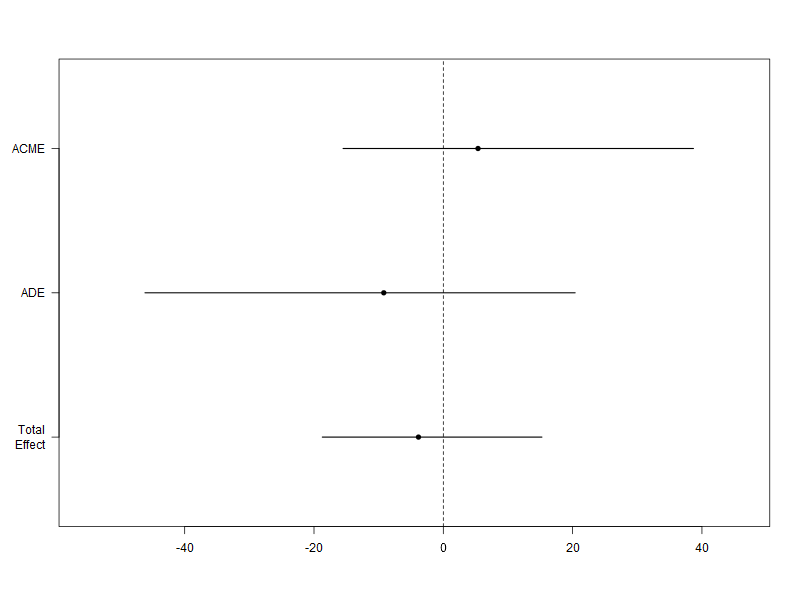

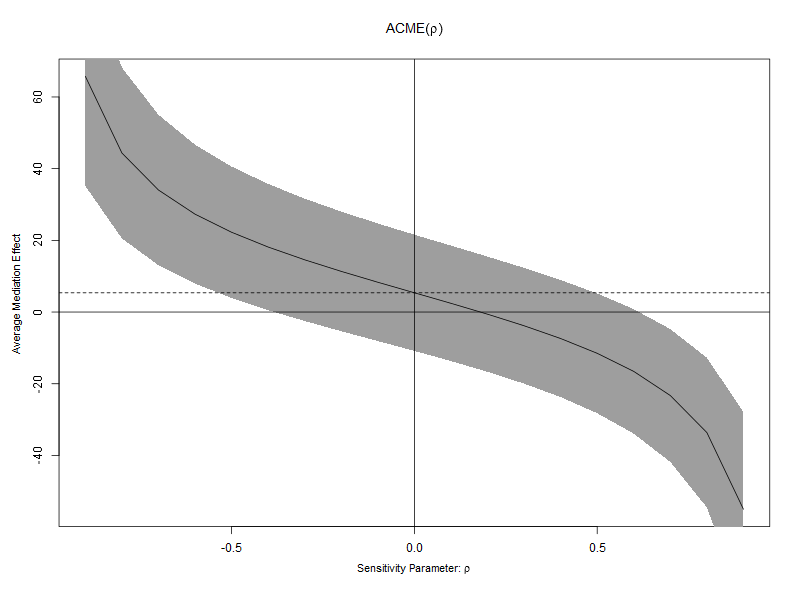

In [59]:
# Packages (install if needed)
# install.packages(c("mediation","broom"))
library(mediation)
library(broom)

# ---- 1. Quick checks & prepare data ----
# change these names if you want a different pair
mediator_post  <- "mip_pre_max_post"
mediator_pre   <- "mip_pre_max_pre"
outcome_post   <- "fss_sum_post"
outcome_pre    <- "fss_sum_pre"
treat_var      <- "interventiongroup"

# Ensure columns exist
missing_vars <- setdiff(c(mediator_post, mediator_pre, outcome_post, outcome_pre, treat_var), colnames(df))
if(length(missing_vars) > 0) stop("Missing variables in df: ", paste(missing_vars, collapse = ", "))

# Ensure treatment is numeric 0/1
if(!is.numeric(df[[treat_var]])) {
  # try to coerce factors to 0/1
  if(is.factor(df[[treat_var]])) {
    levs <- levels(df[[treat_var]])
    message("Coercing factor treatment to numeric 0/1 using first two levels: ", paste(levs[1:min(2,length(levs))], collapse = ", "))
    df[[treat_var]] <- as.numeric(df[[treat_var]]) - 1
  } else {
    df[[treat_var]] <- as.numeric(df[[treat_var]])
  }
}

# ---- 2. Fit the component models (ANCOVA-style) ----
# Mediator model: mediator_post ~ mediator_pre + treatment
med_formula <- as.formula(paste0(mediator_post, " ~ ", mediator_pre, " + ", treat_var))
model.M <- lm(med_formula, data = df)

# Outcome model: outcome_post ~ outcome_pre + mediator_post + mediator_pre + treatment
out_formula <- as.formula(paste0(outcome_post, " ~ ", outcome_pre, " + ", mediator_post, " + ", mediator_pre, " + ", treat_var))
model.Y <- lm(out_formula, data = df)

# Quick model checks
cat("\nMediator model (summary):\n"); print(broom::tidy(model.M, conf.int = TRUE))
cat("\nOutcome model (summary):\n");  print(broom::tidy(model.Y, conf.int = TRUE))

# ---- 3. Run mediation (Imai et al.) ----
set.seed(123)  # reproducible bootstrap
med_out <- mediate(model.M, model.Y,
                   treat = treat_var,
                   mediator = mediator_post,
                   boot = TRUE,
                   sims = 5000)   # increase sims if you want more precision

# ---- 4. Print results ----
summary(med_out)

# Useful pieces:
# med_out$d0        -> ACME (average causal mediation effect)
# med_out$tau.coef  -> total effect
# med_out$z0        -> ADE (direct effect, sometimes labeled differently)
# med_out$n0        -> proportion mediated (when defined)

# ---- 5. Plot mediation results ----
# simple plot of ACME/ADE CIs
plot(med_out)           # forest-like plots (ACME, ADE, total)

# ---- 6. Sensitivity analysis (how strong unobserved confounding must be) ----
sens <- medsens(med_out, rho.by = 0.1, sims = 1000)
print(sens)
plot(sens)


In [11]:
# View
View(tidy_results)

In [46]:
# 6. Run frequentist mediation loop
# -------------------------------
mediation_results <- data.frame(
  mediator = character(),
  outcome = character(),
  ACME = numeric(),
  ACME_p = numeric(),
  ADE = numeric(),
  ADE_p = numeric(),
  total_effect = numeric(),
  prop_mediated = numeric(),
  stringsAsFactors = FALSE
)

for (med in objective_changes) {
  for (out in all_changes) {
    
    if (med == out) next
    
    # Fit mediator model
    med_model <- lm(as.formula(paste0(med, " ~ interventiongroup")), data = df)
    
    # Fit outcome model
    out_model <- lm(as.formula(paste0(out, " ~ ", med, " + interventiongroup")), data = df)
    
    # Run mediation with bootstrapping
    med_fit <- mediate(med_model, out_model,
                       treat = "interventiongroup",
                       mediator = med,
                       boot = TRUE, sims = 5000)
    
    # Extract results
    res <- data.frame(
      mediator = med,
      outcome = out,
      ACME = med_fit$d0,
      ACME_p = med_fit$d0.p,
      ADE = med_fit$z0,
      ADE_p = med_fit$z0.p,
      total_effect = med_fit$tau.coef,
      prop_mediated = med_fit$n0
    )
    
    mediation_results <- bind_rows(mediation_results, res)
  }
}

Running nonparametric bootstrap

Running nonparametric bootstrap

Running nonparametric bootstrap



Warning messages:
1: In predict.lm(new.fit.M, type = "response", newdata = pred.data.t) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
2: In predict.lm(new.fit.Y, type = "response", newdata = pred.data.t) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
3: In predict.lm(new.fit.Y, type = "response", newdata = pred.data.c) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
4: In predict.lm(new.fit.Y, type = "response", newdata = pred.data.t) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases
5: In predict.lm(new.fit.Y, type = "response", newdata = pred.data.t) :
  prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases


: Error in `mediate()`:
! number of observations do not match between mediator and outcome models

# Bayesian Mediation

In [5]:
library(brms)
library(dplyr)

# Define your lists of mediators and outcomes (change scores)
mediators <- c(
  "mip_pre_max_change", "mip_post_max_change",
  "smip_pre_max_change", "smip_post_max_change",
  "pif_pre_max_change", "pif_post_max_change",
  "sindex_pre_max_change", "sindex_post_max_change",
  "fmd_percent_change", "cpet_vo2peak_relative_change",
  "cpet_vo2peak_absolute_change", "cpet_vo2max_percentpredicted_change"
)

outcomes <- c(
  "fss_sum_change", "dsq_sum_change", "woods_sum_change",
  "vas_fatiguecurrent_change", "psqi_sum_change", "sfpa_sum_change"
)

# Prepare an empty list to store results
mediation_results <- list()

# Loop over mediators and outcomes
for (med in mediators) {
  for (out in outcomes) {
    cat("Running Bayesian mediation for mediator:", med, "→ outcome:", out, "\n")
    
    # Fit mediator model
    fit_M <- brm(
      formula = as.formula(paste(med, "~ interventiongroup")),
      data = df,
      family = gaussian(),
      prior = c(
        prior(normal(0, 10), class = "Intercept"),
        prior(normal(0, 1), class = "b"),
        prior(student_t(3, 0, 1), class = "sigma")
      ),
      chains = 4, iter = 4000, cores = 4, refresh = 0
    )
    
    # Fit outcome model
    fit_Y <- brm(
      formula = as.formula(paste(out, "~ interventiongroup +", med)),
      data = df,
      family = gaussian(),
      prior = c(
        prior(normal(0, 10), class = "Intercept"),
        prior(normal(0, 1), class = "b"),
        prior(student_t(3, 0, 1), class = "sigma")
      ),
      chains = 4, iter = 4000, cores = 4, refresh = 0
    )
    
    # Extract posterior samples
    post_M <- as_draws_df(fit_M) %>% dplyr::select(starts_with("b_")) %>% rename(beta_M = 1)
    post_Y <- as_draws_df(fit_Y) %>% dplyr::select(starts_with("b_")) %>% rename(gamma = paste0("b_", med), beta_Y = "b_interventiongroup")
    
    post <- cbind(post_M, post_Y)
    
    # Calculate ACME, ADE, Total
    post <- post %>%
      mutate(
        ACME = beta_M * gamma,
        ADE  = beta_Y,
        Total = ACME + ADE
      )
    
    # Summarize posterior
    summary <- post %>%
      summarise(
        mediator = med,
        outcome = out,
        ACME_mean = mean(ACME),
        ACME_lower = quantile(ACME, 0.025),
        ACME_upper = quantile(ACME, 0.975),
        ADE_mean = mean(ADE),
        ADE_lower = quantile(ADE, 0.025),
        ADE_upper = quantile(ADE, 0.975),
        Total_mean = mean(Total),
        Total_lower = quantile(Total, 0.025),
        Total_upper = quantile(Total, 0.975)
      )
    
    mediation_results[[paste(med, out, sep = "_")]] <- summary
  }
}

# Combine all results into one dataframe
mediation_summary_df <- bind_rows(mediation_results)
mediation_summary_df


Running Bayesian mediation for mediator: mip_pre_max_change → outcome: fss_sum_change 


: Error:
! The following variables can neither be found in 'data' nor in 'data2':
'mip_pre_max_change'

In [5]:
mediators <- c("mip_pre_change", "mip_post_change", "smip_pre_change", "smip_post_change")
outcomes  <- c("fss_change", "dsq_change", "woods_change", "vas_fatigue_change", "psqi_change", "sfpa_change")

for (med in mediators) {
  for (out in outcomes) {
    formula_str <- paste0(out, " ~ ", med, " + interventiongroup")
    fit <- brm(as.formula(formula_str), data = df, chains = 4, iter = 2000)
    print(fit)
  }
}


Compiling Stan program...
Start sampling

SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.45 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.076 seconds (Warm-up)
Chain 1:                0.043 second

There were 24 warnings (use warnings() to see them)


## 8/16

In [ ]:
library(tidyverse)
library(brms)

# -------------------------------
# 1. Define outcome and mediator measures
# -------------------------------

# Subjective outcomes
outcome_measures <- list(
  fss        = list(pre = "fss_sum_pre", post = "fss_sum_post"),
  dsq        = list(pre = "dsq_sum_pre", post = "dsq_sum_post"),
  woods      = list(pre = "woods_sum_pre", post = "woods_sum_post"),
  vas_fatigue = list(pre = "vas_fatiguecurrent_pre", post = "vas_fatiguecurrent_post"),
  psqi       = list(pre = "psqi_sum_pre", post = "psqi_sum_post"),
  sfpa       = list(pre = "sfpa_sum_pre", post = "sfpa_sum_post")
)

# Objective mediators
mediator_measures <- list(
  mip_pre   = list(pre = "mip_pre_max_pre", post = "mip_pre_max_post"),
  mip_post  = list(pre = "mip_post_max_pre", post = "mip_post_max_post"),
  smip_pre  = list(pre = "smip_pre_max_pre", post = "smip_pre_max_post"),
  fmd       = list(pre = "fmd_percent_pre", post = "fmd_percent_post"),
  vo2_rel   = list(pre = "cpet_vo2peak_relative_pre", post = "cpet_vo2peak_relative_post")
)

# -------------------------------
# 2. Set priors (weakly informative for now)
# -------------------------------
priors <- c(
  prior(normal(0, 1), class = "b"),         
  prior(student_t(3, 0, 10), class = "sigma")
)

options(mc.cores = parallel::detectCores())  # parallelize chains

# -------------------------------
# 3. Loop through outcomes & mediators
# -------------------------------
results <- list()

for(outcome_name in names(outcome_measures)){
  outcome_post <- outcome_measures[[outcome_name]]$post
  outcome_pre  <- outcome_measures[[outcome_name]]$pre
  
  for(mediator_name in names(mediator_measures)){
    mediator_post <- mediator_measures[[mediator_name]]$post
    mediator_pre  <- mediator_measures[[mediator_name]]$pre
    
    # ANCOVA-style formula: post ~ mediator_post + mediator_pre + intervention
    formula_str <- paste0(outcome_post, " ~ ", mediator_post, " + ", mediator_pre, " + interventiongroup")
    
    fit <- brm(
      formula = as.formula(formula_str),
      data = df,
      prior = priors,
      chains = 4,
      iter = 2000,
      warmup = 1000,
      seed = 123,
      refresh = 0  # suppress verbose Stan output
    )
    
    # Save concise posterior summary
    results[[paste0(outcome_name, "_by_", mediator_name)]] <- posterior_summary(fit)
    
    cat("Finished model:", outcome_name, "by", mediator_name, "\n")
  }
}

# -------------------------------
# 4. Examine results
# -------------------------------
# Example: view FSS ~ MIP pre
results$fss_by_mip_pre



Compiling Stan program...
Start sampling
Finished model: fss by mip_pre 
Compiling Stan program...
Start sampling
Finished model: fss by mip_post 
Compiling Stan program...
Start sampling
Finished model: fss by smip_pre 
Compiling Stan program...
Start sampling
Finished model: fss by fmd 
Compiling Stan program...
Start sampling
Finished model: fss by vo2_rel 
Compiling Stan program...
Start sampling
Finished model: dsq by mip_pre 
Compiling Stan program...
Start sampling
Finished model: dsq by mip_post 
Compiling Stan program...
Start sampling
Finished model: dsq by smip_pre 
Compiling Stan program...
Start sampling
Finished model: dsq by fmd 
Compiling Stan program...
Start sampling
Finished model: dsq by vo2_rel 
Compiling Stan program...
Start sampling
Finished model: woods by mip_pre 
Compiling Stan program...
Start sampling
Finished model: woods by mip_post 
Compiling Stan program...
Start sampling
Finished model: woods by smip_pre 
Compiling Stan program...
Start sampling
Finish

There were 30 warnings (use warnings() to see them)


In [8]:
# Optional: combine all into a table for export
write.csv(do.call(rbind, results), "bayes_ancova_mediation_results.csv")


# HLM Mediation

## Frequentist

## 11/20

## Sleep

In [38]:

mediators <- c("smip_pre_max", "smip_post_max", "pif_pre_max", "pif_post_max", "sindex_pre_max", "sindex_post_max", "anxiety_sum", "depression_sum", "sfpa_sum")
outcomes  <- c("psqi_sum", "psqi_disturbances")

# ---- storage for CSV ----
results_list <- list()

# ---- PDF diagnostics ----
pdf("mediation_diagnostics.pdf", width = 8, height = 6)

row_index <- 1

for (med in mediators) {
  for (out in outcomes) {
    
    message("Running: ", med, " -> ", out)

    # Subset complete data
    vars_needed <- c(med, out, "time_point", "record_id")
    temp_data <- df_long[complete.cases(df_long[vars_needed]), ]
    
    if (nrow(temp_data) < 10) {
      message("Skipping (too few rows).")
      next
    }
    
    # Build formulas
    med_formula <- as.formula(paste0(med, " ~ time_point + (1 | record_id)"))
    out_formula <- as.formula(paste0(out, " ~ time_point + ", med, " + (1 | record_id)"))
    
    # Fit models with error handling
    med.fit <- try(lmer(med_formula, data = temp_data, REML = FALSE), silent = TRUE)
    if (inherits(med.fit, "try-error")) next
    
    out.fit <- try(lmer(out_formula, data = temp_data, REML = FALSE), silent = TRUE)
    if (inherits(out.fit, "try-error")) next
    
    # Mediation analysis
    med.out <- try(
      mediate(
        model.m = med.fit,
        model.y = out.fit,
        treat = "time_point",
        mediator = med,
        sims = 2000
      ), 
      silent = TRUE
    )
    
    if (inherits(med.out, "try-error")) next
    
    #### ---- Save results for CSV ---- ####
    sum_out <- summary(med.out)
    
    results_list[[row_index]] <- data.frame(
      mediator = med,
      outcome  = out,
      ACME_est = sum_out$d0,
      ACME_p   = sum_out$d0.p,
      ADE_est  = sum_out$z0,
      ADE_p    = sum_out$z0.p,
      Total_est = sum_out$tau.coef,
      Total_p   = sum_out$tau.p,
      PropMed  = sum_out$n0,
      stringsAsFactors = FALSE
    )
    row_index <- row_index + 1
    
    #### ---- Diagnostics: Density plot of simulation draws ---- ####
    plot_df <- data.frame(
      ACME = med.out$d0.sims,
      ADE  = med.out$z0.sims
    )
    
    print(
      ggplot(plot_df, aes(x = ACME)) +
        geom_density() +
        ggtitle(paste("ACME Simulation Distribution:", med, "→", out))
    )
    
    print(
      ggplot(plot_df, aes(x = ADE)) +
        geom_density() +
        ggtitle(paste("ADE Simulation Distribution:", med, "→", out))
    )
    
  }
}

dev.off()

# ---- Write CSV ----
results_df <- bind_rows(results_list)
write.csv(results_df, "mediation_results.csv", row.names = FALSE)

message("Done. CSV and PDF created.")


Running: smip_pre_max -> psqi_sum


Warning message:
In grid.newpage() :
  Cannot open temporary file 'C:\Users\ZCooper\AppData\Local\Temp\RtmpO2C8th\pdf9a5c41044aec' for compression (reason: No such file or directory); compression has been turned off for this device


: Error in `geom_density()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'ACME' not found

## Obj on OBJ

In [ ]:
mediators <- c("mip_post_max", "mip_post_max_percentpredict_2")  # add others if needed
outcomes  <- c("fmd_percent", "cpet_vo2peak_relative")  # add others if needed


pdf("mediation_diagnostics.pdf", width = 8, height = 6)

for (med in mediators) {
  for (out in outcomes) {
    
    # Create complete cases dataset for this mediator-outcome pair
    temp_data <- df_long[complete.cases(df_long[c(med, out, "time_point", "record_id")]), ]
    
    # Check if we have enough data
    if(nrow(temp_data) < 10) {
      cat("Skipping", med, "->", out, "- insufficient data\n")
      next
    }
    
    # Mediator model
    med_formula <- as.formula(paste(med, "~ time_point + (1 | record_id)"))
    med.fit <- lmer(med_formula, data = temp_data, REML = FALSE)
    
    # Outcome model
    out_formula <- as.formula(paste(out, "~ time_point +", med, "+ (1 | record_id)"))
    out.fit <- lmer(out_formula, data = temp_data, REML = FALSE)
    
    # Check if models converged
    if(!is.null(med.fit@optinfo$conv$lme4$messages) | !is.null(out.fit@optinfo$conv$lme4$messages)) {
      cat("Model convergence issues for", med, "->", out, "\n")
      next
    }
    
    # Mediation
    med.out <- mediate(
      model.m = med.fit,
      model.y = out.fit,
      treat = "time_point",
      mediator = med,
      sims = 2000
    )
    
    # Print results
    cat("\n=== Mediation Results:", med, "->", out, "===\n")
    print(summary(med.out))
    
    # --- Your diagnostic plots here ---
    # ... [rest of your plotting code]
    
    cat("Finished mediation for:", med, "->", out, "\n")
  }
}

dev.off()

## Mediation MIP Loop with NA REmoved

In [37]:
mediators <- c("mip_post_max", "mip_post_max_percentpredict_2", "fmd_percent", "cpet_vo2peak_relative")  # add others if needed
outcomes  <- c("fss_sum", "dsq_sum", "vas_fatiguecurrent", "woods_sum", "psqi_sum", "psqi_disturbances")  # add others if needed


pdf("mediation_diagnostics.pdf", width = 8, height = 6)

for (med in mediators) {
  for (out in outcomes) {
    
    # Create complete cases dataset for this mediator-outcome pair
    temp_data <- df_long[complete.cases(df_long[c(med, out, "time_point", "record_id")]), ]
    
    # Check if we have enough data
    if(nrow(temp_data) < 10) {
      cat("Skipping", med, "->", out, "- insufficient data\n")
      next
    }
    
    # Mediator model
    med_formula <- as.formula(paste(med, "~ time_point + (1 | record_id)"))
    med.fit <- lmer(med_formula, data = temp_data, REML = FALSE)
    
    # Outcome model
    out_formula <- as.formula(paste(out, "~ time_point +", med, "+ (1 | record_id)"))
    out.fit <- lmer(out_formula, data = temp_data, REML = FALSE)
    
    # Check if models converged
    if(!is.null(med.fit@optinfo$conv$lme4$messages) | !is.null(out.fit@optinfo$conv$lme4$messages)) {
      cat("Model convergence issues for", med, "->", out, "\n")
      next
    }
    
    # Mediation
    med.out <- mediate(
      model.m = med.fit,
      model.y = out.fit,
      treat = "time_point",
      mediator = med,
      sims = 2000
    )
    
    # Print results
    cat("\n=== Mediation Results:", med, "->", out, "===\n")
    print(summary(med.out))
    
    # --- Your diagnostic plots here ---
    # ... [rest of your plotting code]
    
    cat("Finished mediation for:", med, "->", out, "\n")
  }
}

dev.off()


=== Mediation Results: mip_post_max -> fss_sum ===

Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -5.01177     -9.64471     -1.27674   0.005 ** 
ADE             -5.29358    -10.91956      0.30986   0.066 .  
Total Effect   -10.30535    -15.67690     -5.18942  <2e-16 ***
Prop. Mediated   0.48733      0.12790      1.04866   0.005 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 38 


Simulations: 2000 

Finished mediation for: mip_post_max -> fss_sum 

=== Mediation Results: mip_post_max -> dsq_sum ===

Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

               Estimate 95% CI Lower 95% CI Upper p-value  
ACME           -

pdf 
  2 

## Time Loop with Diagnostics

In [34]:
# Define mediators and outcomes
mediators <- c("mip_post_max", "mip_post_max_percentpredict_2", "fmd_percent", "cpet_vo2peak_relative")  # add others if needed
outcomes  <- c("fss_sum", "dsq_sum", "vas_fatiguecurrent", "woods_sum", "psq_sum", "psq_disturbances")  # add others if needed


pdf("mediation_diagnostics.pdf", width = 8, height = 6)

for (med in mediators) {
  for (out in outcomes) {
    
    # Mediator model
    med_formula <- as.formula(paste(med, "~ time_point + (1 | record_id)"))
    med.fit <- lmer(med_formula, data = df_long, REML = FALSE)
    
    # Outcome model
    out_formula <- as.formula(paste(out, "~ time_point +", med, "+ (1 | record_id)"))
    out.fit <- lmer(out_formula, data = df_long, REML = FALSE)
    
    # Mediation
    med.out <- mediate(
      model.m = med.fit,
      model.y = out.fit,
      treat = "time_point",
      mediator = med,
      sims = 2000
    )
    
    # --- Diagnostics for mediator model ---
    par(mfrow=c(2,2), mar=c(4,4,2,1))
    plot(resid(med.fit), main=paste("Residuals of Mediator:", med))
    qqnorm(resid(med.fit), main=paste("Q-Q Plot Mediator:", med))
    qqline(resid(med.fit))
    
    ranef_med <- ranef(med.fit)$record_id[,1]
    hist(ranef_med, main=paste("Random Intercepts Mediator:", med), xlab="Intercepts")
    
    # --- Diagnostics for outcome model ---
    par(mfrow=c(2,2), mar=c(4,4,2,1))
    plot(resid(out.fit), main=paste("Residuals of Outcome:", out))
    qqnorm(resid(out.fit), main=paste("Q-Q Plot Outcome:", out))
    qqline(resid(out.fit))
    
    ranef_out <- ranef(out.fit)$record_id[,1]
    hist(ranef_out, main=paste("Random Intercepts Outcome:", out), xlab="Intercepts")
    
    cat("Finished diagnostics for mediator:", med, "outcome:", out, "\n")
  }
}

dev.off()


Finished diagnostics for mediator: mip_post_max outcome: fss_sum 
Finished diagnostics for mediator: mip_post_max outcome: dsq_sum 


Warning message:
In plot.new() :
  Cannot open temporary file 'C:\Users\ZCooper\AppData\Local\Temp\RtmpO2C8th\pdf9a5c22d82b39' for compression (reason: No such file or directory); compression has been turned off for this device


: Error in `mediate()`:
! number of observations do not match between mediator and outcome models

## Time Point Loop

In [ ]:

# Define mediators and outcomes
mediators <- c("mip_post_max", "fmd_percent", "cpet_vo2peak_relative")  # add others if needed
outcomes  <- c("fss_sum", "woods_sum")  # add others if needed

# Empty dataframe to store results
results_df <- data.frame(
  outcome = character(),
  mediator = character(),
  ACME_estimate = numeric(),
  ACME_CI_lower = numeric(),
  ACME_CI_upper = numeric(),
  ACME_p = numeric(),
  ADE_p = numeric(),
  stringsAsFactors = FALSE
)

# Loop
for (med in mediators) {
  for (out in outcomes) {
    
    # Mediator model: mediator ~ time_point + (1|record_id)
    med_formula <- as.formula(paste(med, "~ time_point + (1 | record_id)"))
    med.fit <- lmer(med_formula, data = df_long, REML = FALSE)
    
    # Outcome model: outcome ~ time_point + mediator + (1|record_id)
    out_formula <- as.formula(paste(out, "~ time_point +", med, "+ (1 | record_id)"))
    out.fit <- lmer(out_formula, data = df_long, REML = FALSE)
    
    # Mediation
    med.out <- mediate(
      model.m = med.fit,
      model.y = out.fit,
      treat = "time_point",
      mediator = med,
      sims = 2000  # bootstrap
    )
    
    # Extract results
    tmp <- data.frame(
      outcome = out,
      mediator = med,
      ACME_estimate = med.out$d0,
      ACME_CI_lower = med.out$d0.ci[1],
      ACME_CI_upper = med.out$d0.ci[2],
      ACME_p = med.out$d0.p,
      ADE_p = med.out$z0.p
    )
    
    results_df <- rbind(results_df, tmp)
    
    cat("Finished mediator:", med, "outcome:", out, "\n")
  }
}

# Save to CSV
write.csv(results_df, "timepoint_mediation_results.csv", row.names = FALSE)

# Quick check
print(results_df)


Finished mediator: mip_post_max outcome: fss_sum 
Finished mediator: mip_post_max outcome: woods_sum 
Finished mediator: fmd_percent outcome: fss_sum 
Finished mediator: fmd_percent outcome: woods_sum 
Finished mediator: cpet_vo2peak_relative outcome: fss_sum 
Finished mediator: cpet_vo2peak_relative outcome: woods_sum 
        outcome              mediator ACME_estimate ACME_CI_lower
2.5%    fss_sum          mip_post_max   -4.99675629   -10.1224223
2.5%1 woods_sum          mip_post_max   -2.09876167    -4.9057524
2.5%2   fss_sum           fmd_percent   -2.16307999    -6.0651773
2.5%3 woods_sum           fmd_percent   -1.63365975    -4.1476407
2.5%4   fss_sum cpet_vo2peak_relative   -0.90945990    -2.7715486
2.5%5 woods_sum cpet_vo2peak_relative   -0.06727788    -0.7554276
      ACME_CI_upper ACME_p ADE_p
2.5%    -1.12137876  0.007 0.074
2.5%1    0.11729232  0.063 0.049
2.5%2    0.79132172  0.169 0.004
2.5%3    0.08510217  0.070 0.014
2.5%4    0.42522517  0.203 0.000
2.5%5    0.5647377

## Time Point

In [28]:
library(lme4)
library(mediation)
x <- "mip_post_max"
y <- "fss_sum"

med.formula <- as.formula(paste(x, "~ time_point + (1 | record_id)"))
out.formula <- as.formula(paste(y, "~ time_point +", x, "+ (1 | record_id)"))

med.fit <- lmer(med.formula, data = df_long)
out.fit <- lmer(out.formula, data = df_long)


# Mediation analysis (no boot)
med.out <- mediate(
  model.m = med.fit,
  model.y = out.fit,
  treat = "time_point",
  mediator = x,
  sims = 1000  # parametric simulations
)

print(summary(med.out))



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -4.96488     -9.93304     -1.06912   0.012 *  
ADE             -5.34106    -11.63222      0.58202   0.076 .  
Total Effect   -10.30594    -15.72425     -4.89718  <2e-16 ***
Prop. Mediated   0.48160      0.09501      1.09473   0.012 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 38 


Simulations: 1000 



## Treatment Group

In [26]:
library(mediation)

# 1. mediator model
med.mod <- lm(mip_post_max_post ~ interventiongroup + mip_post_max_pre, data = df_wide)

# 2. outcome model
out.mod <- lm(fss_sum_post ~ interventiongroup + mip_post_max_post + fss_sum_pre + mip_post_max_pre,
              data = df_wide)

# 3. mediation
res <- mediate(med.mod, out.mod, treat = "interventiongroup", mediator = "mip_post_max_post",
               boot = TRUE, sims = 2000)

print(summary(res))


Running nonparametric bootstrap


Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

                  Estimate 95% CI Lower 95% CI Upper p-value
ACME            1.1644e-03  -3.6793e+01   1.7459e+01   0.868
ADE            -1.0142e+01  -3.9318e+01   2.5752e+01   0.465
Total Effect   -1.0141e+01  -2.6039e+01   4.0354e+00   0.116
Prop. Mediated -1.1482e-04  -2.9768e+00   5.0582e+00   0.890

Sample Size Used: 14 


Simulations: 2000 



In [7]:
library(lme4)
library(mediation)
x <- "mip_post_max_percentpredict_2"
y <- "fss_sum"

med.formula <- as.formula(paste(x, "~ time_point + (1 | record_id)"))
out.formula <- as.formula(paste(y, "~ time_point +", x, "+ (1 | record_id)"))

med.fit <- lmer(med.formula, data = df_long)
out.fit <- lmer(out.formula, data = df_long)


# Mediation analysis (no boot)
med.out <- mediate(
  model.m = med.fit,
  model.y = out.fit,
  treat = "time_point",
  mediator = x,
  sims = 1000  # parametric simulations
)

print(summary(med.out))



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -7.15736    -12.68225     -2.80042  <2e-16 ***
ADE             -3.11471     -8.97547      2.96240   0.306    
Total Effect   -10.27207    -16.07860     -4.60889  <2e-16 ***
Prop. Mediated   0.68928      0.30114      1.41606  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 38 


Simulations: 1000 



# OG

In [4]:
library(lme4)
library(mediation)

# Mediator model
med.fit <- lmer(mip_post_max_percentpredict_2 ~ time_point + (1 | record_id), data = df_long)

# Outcome model
out.fit <- lmer(fss_sum ~ time_point + mip_post_max_percentpredict_2 + (1 | record_id), data = df_long)

# Mediation analysis (no boot)
med.out <- mediate(
  model.m = med.fit,
  model.y = out.fit,
  treat = "time_point",
  mediator = "mip_post_max_percentpredict_2",
  sims = 1000  # parametric simulations
)

print(summary(med.out))



Attaching package: ‘lme4’

The following object is masked from ‘package:brms’:

    ngrps


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -7.02552    -12.56782     -2.58444   0.002 ** 
ADE             -3.34563     -9.46484      2.49519   0.284    
Total Effect   -10.37115    -16.13999     -4.73151  <2e-16 ***
Prop. Mediated   0.68113      0.24583      1.37631   0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 38 


Simulations: 1000 



## Path Analysis

### OG August

In [61]:
library(lme4)
library(mediation)
library(dplyr)

# Make sure your df_long has these columns:
# record_id, time_point, fss_sum, mip_pre_max, fmd_percent

# -----------------------------
# Mediator 1: MIP
med_mip <- lmer(mip_pre_max ~ time_point + (1 | record_id), data = df_long)

# Mediator 2: FMD_percent
med_fmd <- lmer(fmd_percent ~ time_point + (1 | record_id), data = df_long)

# Outcome model including both mediators
outcome_model <- lmer(woods_sum ~ time_point + mip_pre_max + fmd_percent + (1 | record_id),
                      data = df_long)

# -----------------------------
# Mediation analysis for MIP (controlling for FMD as a covariate)
med_out_mip <- mediate(
  model.m = med_mip,
  model.y = outcome_model,
  treat = "time_point",
  mediator = "mip_pre_max",
  sims = 1000
)

# Mediation analysis for FMD (controlling for MIP as a covariate)
med_out_fmd <- mediate(
  model.m = med_fmd,
  model.y = outcome_model,
  treat = "time_point",
  mediator = "fmd_percent",
  sims = 1000
)

# -----------------------------
# Print summaries
print(summary(med_out_mip))
print(summary(med_out_fmd))




Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value  
ACME           -3.167220    -7.191070     0.096995   0.064 .
ADE            -0.078721    -4.822166     4.740936   0.976  
Total Effect   -3.245941    -7.846144     1.163491   0.170  
Prop. Mediated  0.861602    -5.227600     6.885031   0.206  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 37 


Simulations: 1000 


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value
ACME           -1.392088    -4.597790     0.983259   0.234
ADE            -0.033462    -4.927719     4.712802   0.994
Total Effect   -1.425550    -6.594648     3.272933   0.626
Pro

### 9/1

#### Option 1: Loop through multiple mediators

##### OBJECTIVE --> SUBJECTIVE

In [19]:
library(lme4)
library(mediation)
library(dplyr)

mediators <- c("mip_pre_max", "mip_post_max", "mip_pre_max_percentpredict_1", "mip_pre_max_percentpredict_2", "mip_post_max_percentpredict_1", "mip_post_max_percentpredict_2", "fmd_percent", "cpet_vo2peak_relative", "cpet_vo2peak_absolute", "cpet_ve", "cpet_o2pulse")
outcomes  <- c("fss_sum", "woods_sum", "dsq_sum", "vas_fatiguecurrent", "psqi_sum", "psqi_disturbances", "cpet_vo2peak_absolute", "cpet_vo2peak_relative", "fmd_percent")

results <- list()

for (med in mediators) {
  # mediator model
  med_model <- lmer(as.formula(paste(med, "~ time_point + (1 | record_id)")), data = df_long)
  
  for (out in outcomes) {
    # outcome model with mediator
    out_model <- lmer(as.formula(paste(out, "~ time_point +", med, "+ (1 | record_id)")), data = df_long)
    
    # mediation analysis
    med_out <- mediate(
      model.m = med_model,
      model.y = out_model,
      treat = "time_point",
      mediator = med,
      sims = 1000
    )
    
    key <- paste(med, "->", out)
    results[[key]] <- summary(med_out)
  }
}

print(results)

There were 50 or more warnings (use warnings() to see the first 50)


$`mip_pre_max -> fss_sum`

Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                 Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -4.467324   -10.397887     0.878267   0.100 .  
ADE             -7.647354   -15.011587     0.252355   0.056 .  
Total Effect   -12.114678   -17.989100    -6.218543  <2e-16 ***
Prop. Mediated   0.362232    -0.072448     1.028350   0.100 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 34 


Simulations: 1000 


$`mip_pre_max -> woods_sum`

Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value   
ACME           -3.010042    -6.761230     0.257473   0.068 . 
ADE            -2.440031    -7.587429     2.2

##### SLEEP --> BRAIN FOG

In [20]:
library(lme4)
library(mediation)
library(dplyr)

mediators <- c("psqi_sum", "psqi_disturbances", "psqi_wake")
outcomes  <- c("woods_sum", "fss_sum", "dsq_sum", "vas_fatiguecurrent", "sfpa_sum")

results <- list()

for (med in mediators) {
  # mediator model
  med_model <- lmer(as.formula(paste(med, "~ time_point + (1 | record_id)")), data = df_long)
  
  for (out in outcomes) {
    # outcome model with mediator
    out_model <- lmer(as.formula(paste(out, "~ time_point +", med, "+ (1 | record_id)")), data = df_long)
    
    # mediation analysis
    med_out <- mediate(
      model.m = med_model,
      model.y = out_model,
      treat = "time_point",
      mediator = med,
      sims = 1000
    )
    
    key <- paste(med, "->", out)
    results[[key]] <- summary(med_out)
  }
}

print(results)

$`psqi_sum -> woods_sum`

Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value   
ACME           -1.070540    -2.762903     0.040493   0.056 . 
ADE            -4.239383    -7.972702    -0.478005   0.024 * 
Total Effect   -5.309923    -9.043017    -1.476784   0.006 **
Prop. Mediated  0.185585    -0.015757     0.662609   0.062 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 34 


Simulations: 1000 


$`psqi_sum -> fss_sum`

Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME            -1.99988     -4.64619     -0.13000    0.03 *  
ADE            -10.02085    -15.11745     -4.99436  <2e-16 

#### Option 2: Multiple Mediators in the same model tested one at a time

In [11]:
library(lme4)
library(mediation)

# Fit mediator models
med_mip <- lmer(mip_pre_max ~ time_point + (1 | record_id), data = df_long)
med_fmd <- lmer(fmd_percent ~ time_point + (1 | record_id), data = df_long)
med_vo2 <- lmer(cpet_vo2peak_relative ~ time_point + (1 | record_id), data = df_long)

outcomes  <- c("fss_sum", "woods_sum", "dsq_sum", "vas_fatiguecurrent", "psqi_sum", "psqi_disturbances")

results_multi <- list()

for (out in outcomes) {
  # outcome model with all 3 mediators
  out_model <- lmer(as.formula(paste(out, "~ time_point + mip_pre_max + fmd_percent + cpet_vo2peak_relative + (1 | record_id)")), 
                    data = df_long)
  
  # Run mediation for each mediator controlling for the others
  med_out_mip <- mediate(med_mip, out_model, treat = "time_point", mediator = "mip_pre_max", sims = 1000)
  med_out_fmd <- mediate(med_fmd, out_model, treat = "time_point", mediator = "fmd_percent", sims = 1000)
  med_out_vo2 <- mediate(med_vo2, out_model, treat = "time_point", mediator = "cpet_vo2peak_relative", sims = 1000)
  
  results_multi[[paste("MIP ->", out)]] <- summary(med_out_mip)
  results_multi[[paste("FMD ->", out)]] <- summary(med_out_fmd)
  results_multi[[paste("VO2 ->", out)]] <- summary(med_out_vo2)
}

results_multi


In [12]:
print(results_multi)

$`MIP -> fss_sum`

Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                Estimate 95% CI Lower 95% CI Upper p-value   
ACME            -1.57212     -8.95487      5.71490   0.650   
ADE             -9.23387    -17.45756     -0.97912   0.026 * 
Total Effect   -10.80599    -18.61444     -3.55566   0.008 **
Prop. Mediated   0.13942     -0.85435      0.86153   0.650   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 34 


Simulations: 1000 


$`FMD -> fss_sum`

Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

Mediator Groups: record_id 

Outcome Groups: record_id 

Output Based on Overall Averages Across Groups 

                 Estimate 95% CI Lower 95% CI Upper p-value  
ACME            -0.653751    -5.463385     3.745928   0.770  
ADE             -9.269535   -17.619800    -1.455490   0.028 *
Total Effec

#### Option 3: Full SEM with Lavaan

In [14]:
library(lavaan)

model <- '
  # Mediators
  mip_pre_max ~ a1*time_point
  fmd_percent ~ a2*time_point
  cpet_vo2peak_relative ~ a3*time_point

  # Outcomes
  fss_sum ~ c1*time_point + b1*mip_pre_max + b2*fmd_percent + b3*cpet_vo2peak_relative
  woods_sum ~ c2*time_point + b1w*mip_pre_max + b2w*fmd_percent + b3w*cpet_vo2peak_relative
  dsq_sum ~ c3*time_point + b1d*mip_pre_max + b2d*fmd_percent + b3d*cpet_vo2peak_relative
  vas_fatiguecurrent ~ c4*time_point + b1v*mip_pre_max + b2v*fmd_percent + b3v*cpet_vo2peak_relative
  psqi_sum ~ c5*time_point + b1p*mip_pre_max + b2p*fmd_percent + b3p*cpet_vo2peak_relative
  psqi_disturbances ~ c6*time_point + b1pd*mip_pre_max + b2pd*fmd_percent + b3pd*cpet_vo2peak_relative

  # Indirect effects (example: FSS)
  ind_mip_fss := a1*b1
  ind_fmd_fss := a2*b2
  ind_vo2_fss := a3*b3
  total_fss := c1 + ind_mip_fss + ind_fmd_fss + ind_vo2_fss

  # Repeat indirects for other outcomes if needed
'

fit <- sem(model, data = df_long, se = "bootstrap", bootstrap = 1000)
summary(fit, standardized = TRUE, fit.measures = TRUE)


This is lavaan 0.6-19
lavaan is FREE software! Please report any bugs.


Warning message:
package ‘lavaan’ was built under R version 4.3.3 
Warning message:
lavaan->lav_data_full():  
   some observed variances are (at least) a factor 1000 times larger than 
   others; use varTable(fit) to investigate 


In [15]:
print(summary(fit, standardized = TRUE, fit.measures = TRUE))

lavaan 0.6-19 ended normally after 201 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        51

  Number of observations                            34

Model Test User Model:
                                                      
  Test statistic                                19.275
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               188.385
  Degrees of freedom                                45
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.886
  Tucker-Lewis Index (TLI)                      -0.703

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -873.721
  Loglikelihood unrestricted model (H1)       -

# End